In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [31]:
# Load averages csv file
df = pd.read_csv('averages.csv')
df.head()

,Podcast_Id,HUMAN,T5,BART,PEGASUS
0,0ERGF0SNWOCUSjecWZGJ82,3.769231,3.076923,1.769231,4.153846
1,0g4S43qvuB4PnOIkxeybiY,3.615385,3.000000,3.000000,2.538462
2,0XuoICBTNepqsXLyYqRCLH,4.153846,3.615385,2.461538,4.000000
3,13ytaAuI0QxlSHc1JkOieu,3.769231,3.692308,3.384615,2.461538
4,2vwBdQNQaktMXYKTtwqK6R,3.846154,4.230769,2.461538,3.461538


In [10]:
# Load segments json file
with open('segments_pred_sampled.json') as f:
    segments = json.load(f)

# Get word counts for each segment
segments_word_counts = []
for segment in segments.values():
    segments_word_counts.append(len(segment.split()))

segments_word_counts

[356, 419, 398, 76, 135, 61, 94, 34, 134, 71]

In [5]:
for pod_id in segments.keys():
    print(pod_id)

0ERGF0SNWOCUSjecWZGJ82
0g4S43qvuB4PnOIkxeybiY
0XuoICBTNepqsXLyYqRCLH
13ytaAuI0QxlSHc1JkOieu
2vwBdQNQaktMXYKTtwqK6R
2yE26ainUewuTJiHZAeQQL
3Du1ESxXKflc1S7QPEqQaT
3PQeaTjalnUrlwdvyTJiCf
3qBoc9iZ6JYVqIBTlkMga7
3rt0yCTZXrYcpFvuejcdoZ


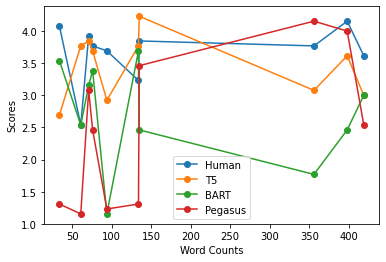

In [12]:
# Plot line graph with scores on the y-axis and word counts on the x-axis

human_x, human_y = zip(*sorted(zip(segments_word_counts, df['HUMAN'])))
t5_x, t5_y = zip(*sorted(zip(segments_word_counts, df['T5'])))
bart_x, bart_y = zip(*sorted(zip(segments_word_counts, df['BART'])))
pegasus_x, pegasus_y = zip(*sorted(zip(segments_word_counts, df['PEGASUS'])))

plt.plot(human_x, human_y, '-o',  label='Human')
plt.plot(t5_x, t5_y,'-o', label='T5')
plt.plot(bart_x, bart_y,'-o', label='BART')
plt.plot(pegasus_x, pegasus_y,'-o', label='Pegasus')
plt.legend()
plt.xlabel('Word Counts')
plt.ylabel('Scores')
plt.show()

In [11]:
# Load the summary csv file
df = pd.read_csv('summaries.csv')
df.head()

,Human,T5,BART,Pegasus
0,Igor's Theme,I Got My Eyes Open - I Got My Eyes Open,"Igor is Tyler, the Creator's first album in fo...",album review
1,Manual testing within Automated DevOps pipelines,Agilent - Is There Still Time to Inject Yourse...,As part of our series of questions and answers...,testers
2,Target Audience of Human Library,Human Library - Is There a Target Audience?,"Criterion Library, an open-air library in the ...",Human Library
3,Hating soda and candy,What Are Some Things You Loved As a Kid and No...,What are some things you loved as a kid that y...,soda
4,Eat something before an argument,Getting Into An Argument - Eat Something,Had to work really well for us is if we start ...,The first question one of us would ask is when...


In [14]:
# Get the average word counts for each model
human_mean = sum([len(x.split()) for x in df['Human']]) / len(df['Human'])
t5_mean = sum([len(x.split()) for x in df['T5']]) / len(df['T5'])
bart_mean = sum([len(x.split()) for x in df['BART']]) / len(df['BART'])
pegasus_mean = sum([len(x.split()) for x in df['Pegasus']]) / len(df['Pegasus'])
print(human_mean, t5_mean, bart_mean, pegasus_mean)


4.1 11.0 21.9 4.2


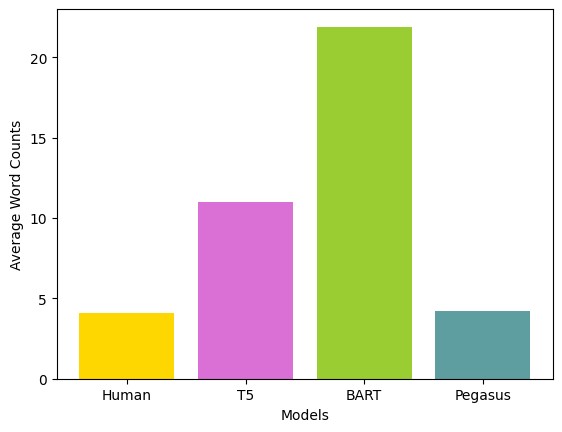

In [27]:
# Plot the means on a bar chart with the model names on the x-axis with different colors
plt.bar(['Human', 'T5', 'BART', 'Pegasus'], [human_mean, t5_mean, bart_mean, pegasus_mean], color=['gold', 'orchid', 'yellowgreen', 'cadetblue'])
plt.xlabel('Models')
plt.ylabel('Average Word Counts')
plt.show()

# import tikzplotlib

# tikzplotlib.save("summary-len-graph.tex")

# import matplotlib as mpl

# plt.close()
# mpl.rcParams.update(mpl.rcParamsDefault)


In [33]:
# Plot the means from averages.csv on a bar chart with the model names on the x-axis with different colors
fig, ax = plt.subplots()
bars = ax.bar(['Human', 'T5', 'BART', 'Pegasus'], [df['HUMAN'].mean(), df['T5'].mean(), df['BART'].mean(), df['PEGASUS'].mean()], color=['gold', 'orchid', 'yellowgreen', 'cadetblue'])
plt.xlabel('Models')
plt.ylabel('Average Relevancy Score')
ax.bar_label(bars)
# plt.show()

import tikzplotlib

tikzplotlib.save("avg-relevancy-graph.tex")

import matplotlib as mpl

plt.close()
mpl.rcParams.update(mpl.rcParamsDefault)